In [1]:
# Install vaderSentiment package for VADER
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 16.9 MB/s 


In [2]:
# Data processing
import pandas as pd
import numpy as np


# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000)

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory
import os
os.chdir("./drive/My Drive/Colab Notebooks/SentimentAnalysis/")

# Print out the current directory
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/SentimentAnalysis


In [4]:
# Read in data
amz_review = pd.read_csv('Reviews_Filter.csv', sep='\t', names=['review'])

# Take a look at the data
amz_review.head()

,review
0,"Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text"
1,"1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most."
2,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,""Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo""""."""
3,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says it all"",""This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' """"The Lion, The Witch, and The Wardrobe"""" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."""
4,"4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal."


In [5]:
# Get the dataset information
amz_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  15000 non-null  object
dtypes: object(1)
memory usage: 117.3+ KB


In [6]:
amz_review.head()

,review
0,"Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text"
1,"1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most."
2,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,""Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo""""."""
3,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says it all"",""This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' """"The Lion, The Witch, and The Wardrobe"""" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."""
4,"4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal."


In [8]:
# Example text
text = 'GrabNGoInfo.com is a great machine learning tutorial website.'

# VADER Sentiment
vader = SentimentIntensityAnalyzer()
vader_sentiment = vader.polarity_scores(text)
vader_sentiment

{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

In [9]:
# Extract sentiment score
vader_sentiment['compound']

0.6249

In [10]:
text2 = 'The food is bad'
vader_sentiment2 = vader.polarity_scores(text2)
vader_sentiment2

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [11]:
vader_sentiment2['compound']

-0.5423

In [12]:
amz_review.head()

,review
0,"Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text"
1,"1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most."
2,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,""Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo""""."""
3,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says it all"",""This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' """"The Lion, The Witch, and The Wardrobe"""" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."""
4,"4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal."


In [13]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer()
amz_review['scores_VADER'] = amz_review['review'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])

# Predict sentiment label for each review
amz_review['pred_VADER'] = amz_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,review,scores_VADER,pred_VADER
0,"Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text",0.0000,1
1,"1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.",0.9441,1
2,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,""Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo"""".""",-0.5664,0
3,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says it all"",""This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' """"The Lion, The Witch, and The Wardrobe"""" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.""",0.8138,1
4,"4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.",0.4404,1


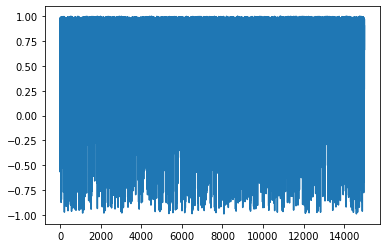

In [20]:
import matplotlib.pyplot as plt 
amz_review['scores_VADER'].plot()
plt.show()